# Assignment 1
## Applied Machine Learning (BUAN 6341)

### <font color='red'>Due Date: February 18, 2022 11:59pm</font> 

Deliverables:

- Submit your answers to conceptual questions (described in another .pdf file) in a pdf file.
- Write down your codes and discussions in the given cells described in this file.
    - Cells for coding are denoted as "YOUR CODE HERE" 
    - Cells for discussions are denoted as "YOUR DISCUSSIONS HERE". Include "#" before each line of your discussions to comment out your wordings (i.e., not considered as code).
    - If you need more cells to check temporary results, add a cell using the "+" button or shortcut "esc + b".
- Submit two files: .pdf and .ipynb to eLearning.


In [1]:
NAME = "Akhil Chandhoke"

### Meet the Data and the Setting

##### Background  
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles.

##### The Dataset

We will be using the daily version of the Capital Bikeshare System dataset from the UCI Machine Learning Repository. This data set contains information about the daily count of bike rental checkouts in Washington, D.C.’s bikeshare program between 2011 and 2012. It also includes information about the weather and seasonal/temporal features for that day (like whether it was a weekday).
- **day:** Day of the record (relative to day 1:2011-01-01)
- **season:** Season (1:spring, 2:summer, 3:fall, 4:winter)
- **weekday:** Day of the week (0=Sunday, 6=Saturday)
- **workingday:** If day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit:**<br>
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
- **temp:** Normalized temperature in Celcius
- **windspeed:** Normalized wind speed
- **casual:** Count of checkouts by casual/non-registered users
- **registered:** Count of checkouts by registered users
- **cnt:** Total checkouts

##### Practice Prep
The cells below imports basic packages as well as the bike-sharing dataset. The original dataset is loaded as Pandas DataFrame, and is named as 'daily'. Run and read through the cells below to obtain a general understanding of the data.

In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
daily = pd.read_csv("day.csv")
daily.head()

,day,season,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
0,1,1,6,0,2,0.344167,0.160446,331,654,985
1,2,1,0,0,2,0.363478,0.248539,131,670,801
2,3,1,1,1,1,0.196364,0.248309,120,1229,1349
3,4,1,2,1,1,0.200000,0.160296,108,1454,1562
4,5,1,3,1,1,0.226957,0.186900,82,1518,1600


In [4]:
print(daily.columns)

Index(['day', 'season', 'weekday', 'workingday', 'weathersit', 'temp',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')


**Question 1 : Data Exploration.** (12 points)

- Plot the daily count of bikes that were checked out by **casual/non-registered** users (y) against the temperature (x). 
- Set the color based on whether it is a working day. Set transparency to 0.7. 
- Include appropriate labels for x-axis and y-axis, and colorbar. *Hint: use plt.colorbar(ticks = [0,1]) to change the ticks.*
- What insights can you get?

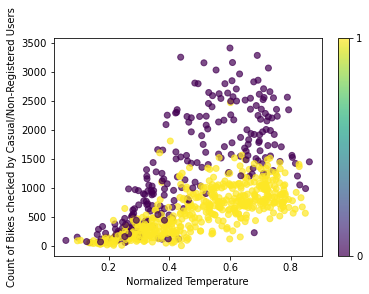

In [5]:
## YOUR CODE HERE ##

#We create the Scatter plot as told.

y = daily['casual']
x = daily['temp']
category=daily['workingday']

plt.scatter(x,y,c=category, alpha=.7)
plt.ylabel("Count of Bikes checked by Casual/Non-Registered Users")
plt.xlabel("Normalized Temperature")
plt.colorbar(ticks=[0,1])

In [6]:
##DISCUSSION 

#My conclusion for the above graph is as follows:-
#1.The maximum count of bikes checked by casual users is 3500 when temperature is .6 and the day is non working day as workingday is 0.
#2.The minimum count of bikes checked by casual users is 0 when temperature is between 0.1 and .5 and the day is working day as working day is 1.
#3.The maximum count of bikes checked by casual users is around 2500 when it is a working day.
#4.The maximum count of bikes checked by casual users is around 3500 when it is not a working day.
#5.With the visualization and analysis, when it is workday, the slope is steeper, so we see that the count increases with increase in normalized temperature, whereas when it is non working day, there is a increase in count against normalized temperature, but the slope is not that steep.
#6.But for a better and indepth stats and result we have to do more analysis.
#7.An interesting insight is that casual users have more maximum count on non working day rather than working day.

## Regression

In this section, you are supposed to complete TWO regression models, some in conjunction with grid search and CV. First, run the cells below to complete the data splitting step. 

In [7]:
# We define X and y
var = ['temp','windspeed','season', 'weekday', 'workingday', 'weathersit']
X = daily[var]
y = daily['cnt']

In [8]:
#We then do Data splitting for training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Question 2: Linear Regression**

- Train a linear regression model. Report and specify clearly the estimated coefficients and intercept.   
  *Hint: use print("The intercept is:", INTERCEPT_RSLT) to specify the result reported is the intercept.*
- Obtain the predicted y for (1) test set and (2) training set. Store the results properly.
- Calculate and use print function to report (1) the MSE for test set and (2) the MSE for training set.
- We have obtained two MSE values. Which one should we report as the unbiased performance measure?
- Can you propose other potential measures for the model's performance? 
  *(Discussion only. No need to obtain the measure's value)*

In [9]:
#We then show number of observations in the training set
X_train.shape, X_test.shape, y_train.shape

X_train.shape[0]

548

In [12]:
#Before training, a model has been created by the process taught by the professor.

#My model is created below named my_model_assignment1

from sklearn.linear_model import LinearRegression
my_model_assignment1 = LinearRegression()


In [13]:
# We then train the model and report coefficients

# Train the model using the training set
my_model_assignment1.fit(X_train, y_train)

# Print out the coefficients
print("the coefficients are:", my_model_assignment1.coef_)
print("the intercept is:", my_model_assignment1.intercept_)

the coefficients are: [ 5245.48567189 -1995.73565252   412.66281476    76.77426589
   132.20982981  -800.60943777]
the intercept is: 2093.4087280168715


In [14]:
## We then predict y for training and test set

#Predict y for training
y_prediction_train=my_model_assignment1.predict(X_train)
y_prediction_train.shape[0]

print("The predicted y value for train set is:", y_prediction_train.shape[0])

The predicted y value for train set is: 548


In [15]:
#Predict y for test
y_prediction_test = my_model_assignment1.predict(X_test)
y_prediction_test.shape[0]

print("The predicted y value for test set is:", y_prediction_test.shape[0])

The predicted y value for test set is: 183


In [16]:
# We then calculate and report the MSE FOR TRAIN SET(first we calculate error by actual- predicted and get the MSE)
e = y_train - y_prediction_train

MSE_train = np.sum(e**2)/y_prediction_train.shape[0]
MSE_train

print("The MSE value for train set is:",MSE_train)

The MSE value for train set is: 1852849.4373569072


In [17]:
## We then calculate and report the MSE for test set(first we calculate error by actual- predicted and get the MSE)
e = y_test - y_prediction_test

MSE_test = np.sum(e**2)/y_prediction_test.shape[0]
MSE_test

print("The MSE value for test set is:",MSE_test)

The MSE value for test set is: 1816812.3742340659


In [20]:
## Discussion: Which is the unbiased performance measure? Can you propose other performance measures?

#MSE for the test set is the unbiased performance measure.Because the model has been trained using training data and will not reflect the accurate picture, so we should take MSE on the test set.
#We can find MAE and 
#R-square as R-squared shows, how well the model captures the variance of the data. So, a R-squared value will indicate a better performance. 

#rsquare for test set
my_model_assignment1.score(X_test, y_test)

0.5285823895780065

**Question 3: Polynomial Regression**

- Train a Polynomial regression model with grid search and 10-fold cross-validation. Let the grid of the hyperparameter be: [1,2,3]. Leave other parameters as default.
- Report the hyperparameter chosen (i.e., the degree selected) and the mean of validation score of the chosen model.
- Obtain the chosen model's unbiased performance (based on default measure, R-squared).

In [21]:
# Train the model, and report the results

# we load gridsearchCV
from sklearn.model_selection import GridSearchCV

# then we Load other modules
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# We define grid of parameter.param_poly1 is hyperparams
# We take range (1,4) as it should have 1,2,3

parampoly1 = {'polynomialfeatures__degree' :  range(1,4)  }

#We then define estimator: use make_pipeline to combine two functions. 

gridpoly1=PolynomialFeatures()

gridlr1=LinearRegression()

gridpipe1=make_pipeline(gridpoly1,gridlr1) 

#We then define GridSearchCV Estimation function, then train the model

gridsearchpoly1=GridSearchCV(gridpipe1,parampoly1, cv=10)

gridsearchpoly1.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': range(1, 4)})

In [22]:
#We predict then 
gridsearchpoly1.predict(X_test)

array([5377.66864117, 2571.12969418, 3936.32261027, 3207.41698848,
       5642.5917853 , 6349.76788427, 1597.51486515, 3632.53364685,
       5922.85299361, 5604.20636755, 2347.41817785, 3470.39834357,
       5035.61493958, 4441.4026886 , 3284.73951915, 3035.02988544,
       3347.09921451, 6473.25891013, 6631.9538479 , 2317.14923947,
       6261.83405074, 7092.35133583, 4062.89285789, 2606.14601853,
       2395.07409246, 5920.14230639, 3032.48305205, 5565.28953661,
       3147.57614262, 4942.36366952, 3969.02724362, 5101.4975948 ,
       4743.93003638, 5403.80792553, 4249.18205163, 4029.27372116,
       5787.22919529, 5173.8149008 , 4147.5389987 , 1833.83225986,
       5118.90317429, 2945.40911748, 6375.20036791, 4441.54437501,
       6353.40084456, 3324.19848941, 6225.71514366, 3947.80102317,
       5540.10376072, 3171.80692478, 4914.42617623, 3854.7888826 ,
       3373.07063847, 6873.32450651, 6021.105345  , 5341.59219566,
       5697.89982392, 3474.47378939, 5192.52291174, 5832.76169

In [23]:
## 1. Chosen degree: is given by this code
gridsearchpoly1.best_params_

print("The hyperparameter chosen (i.e., the degree selected) is :",gridsearchpoly1.best_params_)

The hyperparameter chosen (i.e., the degree selected) is : {'polynomialfeatures__degree': 1}


In [24]:
## 2. The performance best score
gridsearchpoly1.best_score_

print("The  the mean of validation score of the chosen model is :",gridsearchpoly1.best_score_)

The  the mean of validation score of the chosen model is : 0.46151790928788144


In [25]:
## 3. The best etimator
gridsearchpoly1.best_estimator_

print("The  best estimator of the chosen model is :",gridsearchpoly1.best_estimator_)

The  best estimator of the chosen model is : Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])


In [26]:
## 4. R square
gridsearchpoly1.score(X_test,y_test)

print("The  R-square is :",gridsearchpoly1.score(X_test,y_test))

The  R-square is : 0.5285823895780064
